# Simple Linear Regression

## Importing the libraries

In [16]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


## Importing the dataset

In [17]:
dataset = pd.read_csv('C:/Users/Admin/Downloads/Data Mining (Codes and Datasets)/app/data/Simple Linear Regression/Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

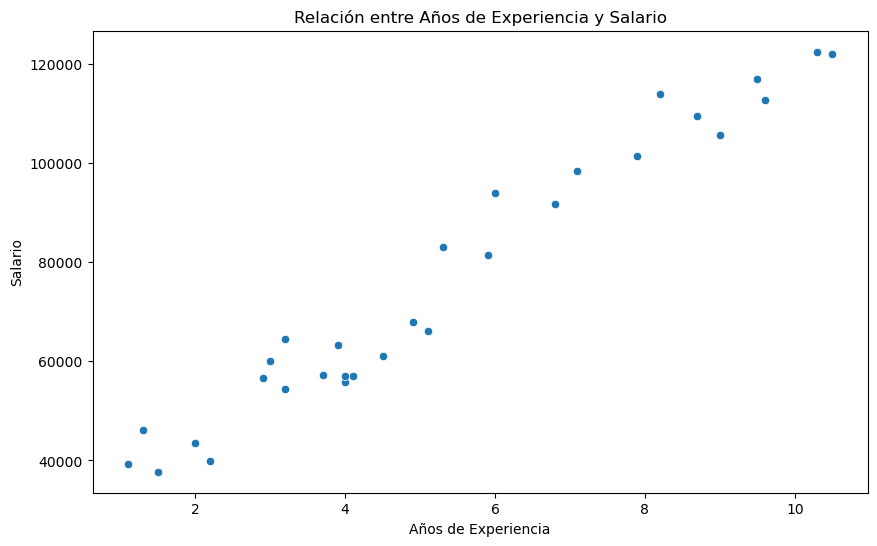

In [19]:
# Descripción estadística de los datos
dataset.describe()

# Visualización de la relación entre años de experiencia y salario
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=dataset)
plt.title("Relación entre Años de Experiencia y Salario")
plt.xlabel("Años de Experiencia")
plt.ylabel("Salario")
plt.show()


## Training the Simple Linear Regression model on the Training set

In [23]:
# Dividir el dataset en variables dependientes (X) e independientes (y)
X = dataset[['YearsExperience']]
y = dataset['Salary']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Predicting the Test set results

In [36]:
# Validación cruzada para evaluar el modelo de manera robusta
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

print(f"RMSE de Validación Cruzada para cada fold: {cv_rmse}")
print(f"RMSE Promedio de Validación Cruzada: {cv_rmse.mean():.2f}")

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el RMSE en el conjunto de prueba
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE en el conjunto de prueba: {rmse_test:.2f}")


RMSE de Validación Cruzada para cada fold: [6435.35630703 5738.73976842 4089.45421946 1763.2792514  7898.13415541]
RMSE Promedio de Validación Cruzada: 5184.99
RMSE en el conjunto de prueba: 6146.92


## Visualising the Training set results

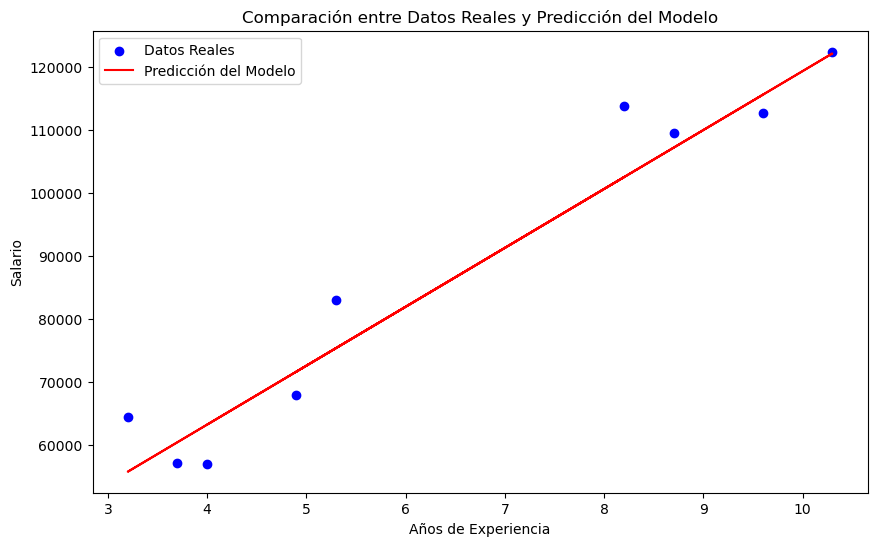

In [37]:
# Comparación entre valores predichos y valores reales en el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label="Datos Reales")
plt.plot(X_test, y_pred, color='red', label="Predicción del Modelo")
plt.title("Comparación entre Datos Reales y Predicción del Modelo")
plt.xlabel("Años de Experiencia")
plt.ylabel("Salario")
plt.legend()
plt.show()


## Visualising the Test set results

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


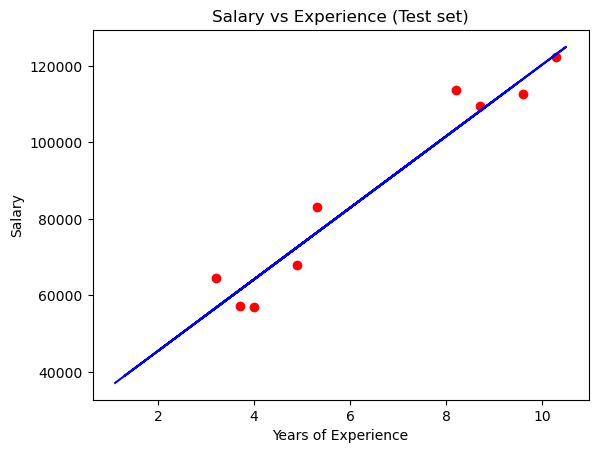

In [38]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [28]:
# Guardar el modelo entrenado
import joblib
joblib.dump(model, 'C:/Users/Admin/Downloads/Data Mining (Codes and Datasets)/app/Models/Simple Linear Regression/simple_linear_regression.pkl')



['C:/Users/Admin/Downloads/Data Mining (Codes and Datasets)/app/Models/Simple Linear Regression/simple_linear_regression.pkl']